In [2]:
# Standard library imports
from pathlib import Path
import warnings

# Data science libraries
import pandas as pd
import numpy as np
from scipy import stats

# Plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
from cycler import cycler
import seaborn as sns

# Optional: For interactive elements
from IPython.display import display

# Suppress common warnings for cleaner output
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

print("All libraries loaded successfully!")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


All libraries loaded successfully!
Matplotlib version: 3.10.3
Pandas version: 2.3.0
NumPy version: 2.2.6


## 🎨 Custom Color Palette

Professional color palette organized by hue families for better visual harmony and accessibility.


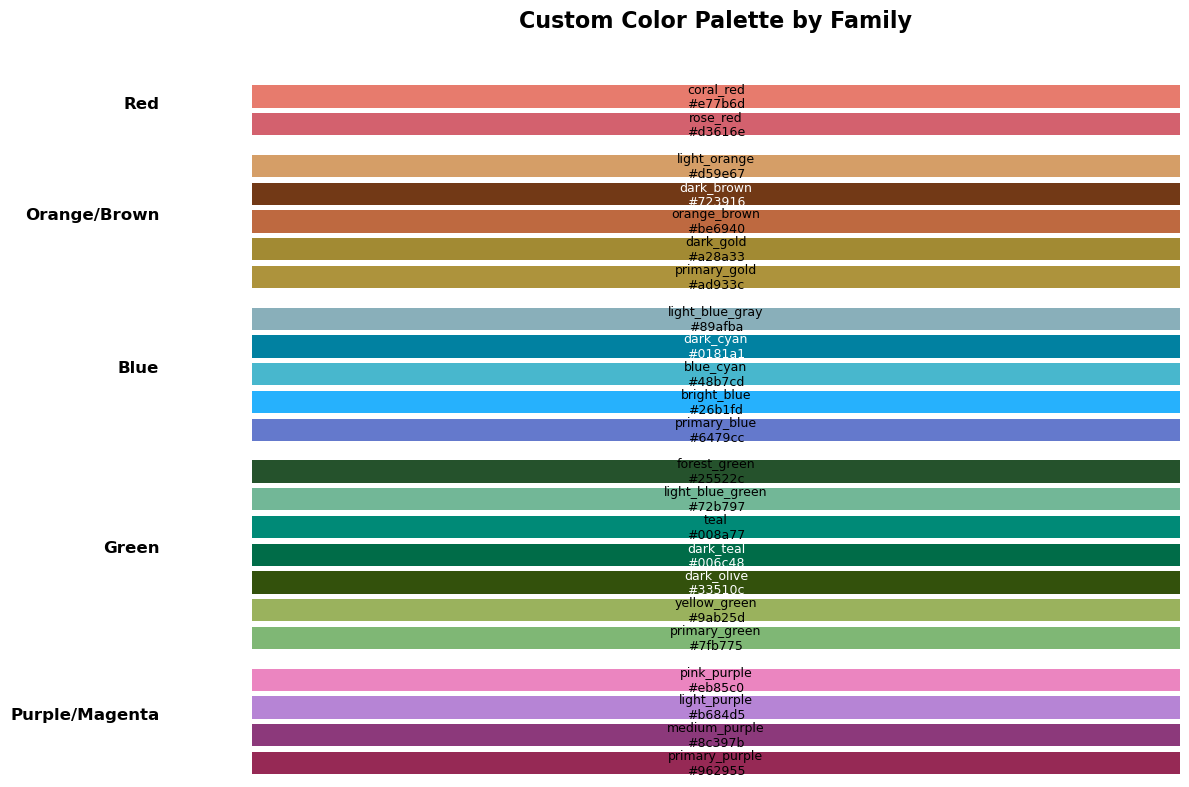

Color palette loaded successfully!
Primary trio: ['#962955', '#7fb775', '#6479cc']
Four-category palette: ['#962955', '#7fb775', '#6479cc', '#ad933c']


In [3]:
# Custom Color Palette - Organized by families
COLORS = {
    # Purple/Magenta Family (4 colors)
    'primary_purple': '#962955',    # Deep pink-purple (primary choice)
    'medium_purple': '#8c397b',     # Medium purple
    'light_purple': '#b684d5',      # Light purple
    'pink_purple': '#eb85c0',       # Pink-purple
    
    # Green Family (7 colors)
    'primary_green': '#7fb775',     # Medium green (primary choice)
    'yellow_green': '#9ab25d',      # Yellow-green
    'dark_olive': '#33510c',        # Dark olive green
    'dark_teal': '#006c48',         # Dark teal-green
    'teal': '#008a77',              # Teal
    'light_blue_green': '#72b797',  # Light blue-green
    'forest_green': '#25522c',      # Forest green
    
    # Blue Family (5 colors)
    'primary_blue': '#6479cc',      # Medium blue (primary choice)
    'bright_blue': '#26b1fd',       # Bright blue
    'blue_cyan': '#48b7cd',         # Blue-cyan
    'dark_cyan': '#0181a1',         # Dark cyan
    'light_blue_gray': '#89afba',   # Light blue-gray
    
    # Orange/Brown Family (5 colors)
    'primary_gold': '#ad933c',      # Golden brown (primary choice)
    'dark_gold': '#a28a33',         # Dark gold
    'orange_brown': '#be6940',      # Orange-brown
    'dark_brown': '#723916',        # Dark brown
    'light_orange': '#d59e67',      # Light orange
    
    # Red Family (2 colors)
    'rose_red': '#d3616e',          # Rose red
    'coral_red': '#e77b6d',         # Coral red
}

# Recommended color combinations
PRIMARY_TRIO = [COLORS['primary_purple'], COLORS['primary_green'], COLORS['primary_blue']]
FOUR_CATEGORY = PRIMARY_TRIO + [COLORS['primary_gold']]
SIX_CATEGORY = FOUR_CATEGORY + [COLORS['bright_blue'], COLORS['medium_purple']]

# Set as default matplotlib color cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=PRIMARY_TRIO)

# Display color palette
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
families = {
    'Purple/Magenta': ['primary_purple', 'medium_purple', 'light_purple', 'pink_purple'],
    'Green': ['primary_green', 'yellow_green', 'dark_olive', 'dark_teal', 'teal', 'light_blue_green', 'forest_green'],
    'Blue': ['primary_blue', 'bright_blue', 'blue_cyan', 'dark_cyan', 'light_blue_gray'],
    'Orange/Brown': ['primary_gold', 'dark_gold', 'orange_brown', 'dark_brown', 'light_orange'],
    'Red': ['rose_red', 'coral_red']
}

y_pos = 0
for family_name, color_names in families.items():
    for i, color_name in enumerate(color_names):
        ax.barh(y_pos, 1, color=COLORS[color_name], height=0.8)
        ax.text(0.5, y_pos, f'{color_name}\n{COLORS[color_name]}', 
               ha='center', va='center', fontsize=9, 
               color='white' if color_name in ['dark_olive', 'dark_teal', 'dark_cyan', 'dark_brown'] else 'black')
        y_pos += 1
    y_pos += 0.5  # Add space between families
    
    # Add family label
    ax.text(-0.1, y_pos - len(color_names)/2 - 0.75, family_name, 
           ha='right', va='center', fontsize=12, weight='bold')

ax.set_xlim(0, 1)
ax.set_ylim(-0.5, y_pos)
ax.set_title('Custom Color Palette by Family', fontsize=16, weight='bold', pad=20)
ax.axis('off')
plt.tight_layout()
plt.show()

print("Color palette loaded successfully!")
print(f"Primary trio: {PRIMARY_TRIO}")
print(f"Four-category palette: {FOUR_CATEGORY}")


## ⚙️ Professional Styling Configuration

Set up consistent, publication-ready styling for all plots.


In [4]:
# Professional styling configuration
def setup_plot_style():
    """Configure matplotlib with professional, publication-ready defaults."""
    
    # General appearance
    plt.rcParams.update({
        'figure.facecolor': 'white',
        'axes.facecolor': 'white',
        'savefig.facecolor': 'white',
        'savefig.dpi': 300,
        'figure.dpi': 100,
        
        # Typography
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans'],
        'font.size': 10,
        'axes.titlesize': 14,
        'axes.titleweight': 'bold',
        'axes.labelsize': 12,
        'axes.labelweight': 'semibold',
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        
        # Line and marker properties
        'axes.linewidth': 1.2,
        'lines.linewidth': 2.0,
        'lines.markersize': 6,
        'patch.linewidth': 1.2,
        
        # Spine and tick properties
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'xtick.bottom': True,
        'xtick.top': False,
        'ytick.left': True,
        'ytick.right': False,
        
        # Grid properties
        'axes.grid': True,
        'grid.alpha': 0.3,
        'grid.linewidth': 0.8,
        'axes.axisbelow': True,
        
        # Legend properties
        'legend.frameon': False,
        'legend.numpoints': 1,
        'legend.scatterpoints': 1,
    })

def clean_axes(ax):
    """Apply clean styling to axes - removes top and right spines."""
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)
    ax.grid(True, alpha=0.3, linewidth=0.8)
    return ax

def add_stats_annotation(ax, text, x=0.05, y=0.95):
    """Add statistical annotation to plot."""
    ax.text(x, y, text, transform=ax.transAxes, 
           bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
           verticalalignment='top', fontsize=9)

def save_plot(fig, filename, formats=['png', 'svg'], dpi=300):
    """Save plot in multiple formats with consistent settings."""
    for fmt in formats:
        filepath = Path(f"{filename}.{fmt}")
        fig.savefig(filepath, format=fmt, dpi=dpi, bbox_inches='tight',
                   facecolor='white', edgecolor='none')
    print(f"Plot saved as: {', '.join([f'{filename}.{fmt}' for fmt in formats])}")

# Apply the styling
setup_plot_style()
print("Professional styling configuration applied!")

# Standard figure sizes for different use cases
FIGURE_SIZES = {
    'small': (4, 3),      # Single plots, supplements
    'medium': (6, 4.5),   # Standard journal figures  
    'large': (8, 6),      # Complex plots with multiple elements
    'wide': (10, 4),      # Time series, genomic data
    'square': (4, 4),     # Correlation plots, heatmaps
}

print("Available figure sizes:", list(FIGURE_SIZES.keys()))


Professional styling configuration applied!
Available figure sizes: ['small', 'medium', 'large', 'wide', 'square']


# 1.Load data

In [5]:
res = pd.read_csv("../../results/HD_DIT_HAP/20_gene_level_clustering/gene_level_clustering_results_kmeans64mergedto8.tsv", sep="\t")

deletion_library_essentiality = pd.read_excel("../../resources/Hayles_2013_OB_merged_categories_sysIDupdated.xlsx")[["Updated_Systematic_ID", "One or multi basic phenotypes", "Category"]]

verification_results = pd.read_excel("../../resources/verfication_results_summary.xlsx")
verification_results = verification_results.dropna(subset=["Verified essentiality"])
verification_results["Verification result"].replace(
    {
        "WT-like": "WT",
        "Very small colony": "very small colonies",
        "Small colony": "small colonies",
        "E, Very small colony": "E",
        "E & very small colonies": "E",
        "small colonies (unequal)": "small colonies",
        "very small colonies (unequal)": "very small colonies",
        "E, 2 & 3": "E",
        "Small colony, Very small colony": "small colonies",
    },
    inplace=True
)

res = pd.merge(res, deletion_library_essentiality, left_on="Systematic ID", right_on="Updated_Systematic_ID", how="left").drop(columns=["Updated_Systematic_ID"])
res["Category_with_essentiality"] = res.apply(lambda row: f"{row['Category']} ({row['DeletionLibrary_essentiality']})" if row["Category"] == 'small colonies' and row["DeletionLibrary_essentiality"] == "E" else row["Category"], axis=1)

In [6]:
selected_categories = ["spores", "germinated", "microcolonies", "very small colonies", "small colonies", "WT"]

selected_categories_with_essentiality = ["spores", "germinated", "microcolonies", "very small colonies", "small colonies", "WT"]

In [7]:
def boxplot_with_violinplot(x, y, ax, colors):
    # Create violin plot
    parts = ax.violinplot(y, 
                         positions=range(len(x)),
                         showmeans=False, showmedians=False, showextrema=False, orientation="horizontal")
    
    # Style violin plots
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[i])
        pc.set_alpha(0.6)
    
    # Create box plot
    box_parts = ax.boxplot(y, 
                          positions=range(len(x)),
                          widths=0.2, patch_artist=True, 
                          medianprops=dict(color='black', linewidth=2),
                          orientation="horizontal")

    for i, bp in enumerate(box_parts['boxes']):
        bp.set_facecolor(colors[i])
        bp.set_alpha(0.8)
    for fy in box_parts['fliers']:
        fy.set_markersize(5)
        fy.set_color("gray")
        fy.set_alpha(0.1)
    
    # Set x-axis labels
    ax.set_yticks(range(len(x)))
    tick_labels = [f"{l} (n={len(y[i])})" for i, l in enumerate(x)]
    ax.set_yticklabels(tick_labels, ha='right', fontsize=14)
    ax.tick_params(axis='both', labelsize=14)


WT2E:  230
verified_WT2E:  144


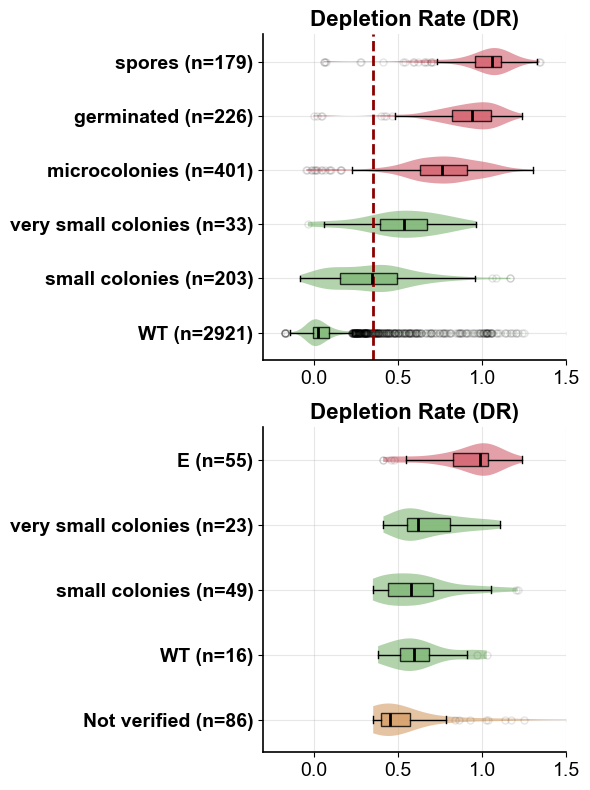

In [36]:
um_dict = res.query("Category in @selected_categories").groupby("Category_with_essentiality")["um"].apply(list).to_dict()
lam_dict = res.query("Category in @selected_categories").groupby("Category_with_essentiality")["lam"].apply(list).to_dict()
um_dict = {
    "WT": um_dict["WT"],
    "small colonies": um_dict["small colonies"],
    "very small colonies": um_dict["very small colonies"],
    "microcolonies": um_dict["microcolonies"],
    "germinated": um_dict["germinated"],
    "spores": um_dict["spores"],
}
lam_dict = {
    "WT": lam_dict["WT"],
    "small colonies": lam_dict["small colonies"],
    "very small colonies": lam_dict["very small colonies"],
    "microcolonies": lam_dict["microcolonies"],
    "germinated": lam_dict["germinated"],
    "spores": lam_dict["spores"],
}

WT2E = res.query("Category == 'WT' and um > 0.35").sort_values(by="um", ascending=False)["Systematic ID"].unique().tolist()
verified_WT2E = verification_results.query("`Systematic ID` in @WT2E").copy()
verified_WT2E_genes = verified_WT2E["Systematic ID"].unique().tolist()
missing_WT2E_genes = [gene for gene in WT2E if gene not in verified_WT2E_genes]

print("WT2E: ", len(WT2E))
print("verified_WT2E: ", len(verified_WT2E))

verified_WT2E["Verification result"].value_counts()

um_dict2 = {
    "Not verified": res[res["Systematic ID"].isin(missing_WT2E_genes)]["um"].tolist(),
    "WT": res[res["Systematic ID"].isin(verified_WT2E.query("`Verification result` == 'WT'")["Systematic ID"])]["um"].tolist(),
    "small colonies": res[res["Systematic ID"].isin(verified_WT2E.query("`Verification result` == 'small colonies'")["Systematic ID"])]["um"].tolist(),
    "very small colonies": res[res["Systematic ID"].isin(verified_WT2E.query("`Verification result` == 'very small colonies'")["Systematic ID"])]["um"].tolist(),
    "E": res[res["Systematic ID"].isin(verified_WT2E.query("`Verification result` == 'E'")["Systematic ID"])]["um"].tolist(),
}


colors = [
    COLORS['primary_green'],
    COLORS['primary_green'],
    COLORS['primary_green'],
    COLORS['rose_red'],
    COLORS['rose_red'],
    COLORS['rose_red'],
]

colors2 = [
    COLORS['light_orange'],
    COLORS['primary_green'],
    COLORS['primary_green'],
    COLORS['primary_green'],
    COLORS['rose_red'],
]

fig, axes = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

boxplot_with_violinplot(list(um_dict.keys()), list(um_dict.values()), axes[0], colors)
axes[0].set_title("Depletion Rate (DR)", fontsize=16, fontweight="bold")
axes[0].set_xlim(-0.3, 1.5)
axes[0].axvline(0.35, color="darkred", linestyle="--", linewidth=2)
boxplot_with_violinplot(list(um_dict2.keys()), list(um_dict2.values()), axes[1], colors2)
axes[1].set_title("Depletion Rate (DR)", fontsize=16, fontweight="bold")

for ax in axes:
    ax.tick_params(axis='both', labelsize=14, labelleft=True, labelbottom=True)
    for label in ax.get_yticklabels():
        label.set_weight('bold')

plt.tight_layout()
plt.show()
plt.close()

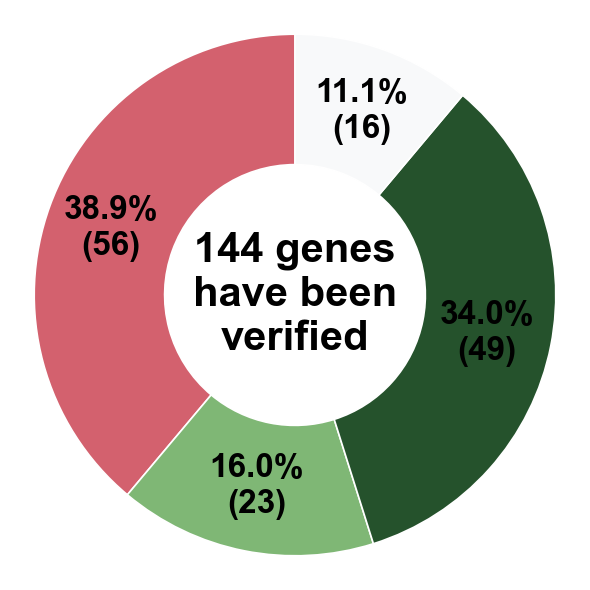

In [33]:
sizes = [56, 23, 49, 16]
labels = ['E', 'very small colonies', 'small colonies', 'WT']
# fig, ax = plt.subplots(figsize=(8, 8))
fig, ax = plt.subplots(figsize=(6, 6))

# Create the donut chart
wedges, texts, autotexts = ax.pie(
    sizes, 
    # labels=labels, 
    colors=[COLORS["rose_red"], COLORS["primary_green"], COLORS["forest_green"], "#f8f9fa"],
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*sum(sizes)):,})',
    startangle=90,
    pctdistance=0.75,
    wedgeprops=dict(width=0.5, edgecolor='white'),
    textprops={'fontsize': 24, 'weight': 'bold'},
)

# Add title
# ax.set_title(title, fontsize=14, fontweight='bold', pad=20)

# Add total count in center
ax.text(0, 0, f'144 genes\nhave been\nverified', 
        ha='center', va='center', fontsize=30, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
# ax.legend(labels, bbox_to_anchor=(1.4, 0.8), fontsize=14)

plt.tight_layout()
plt.show()
plt.close()

In [11]:
verification_results

,Num,Systematic ID,Gene,Hayles_Essentiality,Category,Verification result,Verified essentiality,Note,distance_to_ade6,distance_to_leu1,distance_to_ura4
0,1,SPAC1805.13,rpl14,V,WT,E,E,Grow very slowly on the HYG plate\nVery low tr...,NaN,NaN,NaN
1,2,SPAC23A1.15c,sec20,V,WT,E,E,NaN,NaN,NaN,NaN
2,3,SPAC30C2.06c,dml1,V,WT,E,E,NaN,NaN,NaN,NaN
3,4,SPAC31A2.13c,sft1,V,WT,E,E,NaN,NaN,NaN,NaN
4,5,SPAC9.13c,cwf16,V,WT,E,E,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
265,FromXH,SPCC645.07,rgf1,V,WT,WT,V,NaN,NaN,NaN,NaN
266,FromXH,SPCC663.01c,ekc1,V,very small colonies,very small colonies,V,NaN,NaN,NaN,NaN
267,FromXH,SPCC777.10c,ubc12,E,microcolonies,E,E,NaN,NaN,NaN,NaN
268,FromXH,SPCC970.05,rpl3601,V,WT,small colonies,V,NaN,NaN,NaN,NaN


In [139]:
verification_results.query("`Systematic ID` in @WT2E")

,Num,Systematic ID,Gene,Hayles_Essentiality,Category,Verification result,Verified essentiality,Note,distance_to_ade6,distance_to_leu1,distance_to_ura4
0,1,SPAC1805.13,rpl14,V,WT,E,E,Grow very slowly on the HYG plate\nVery low tr...,NaN,NaN,NaN
1,2,SPAC23A1.15c,sec20,V,WT,E,E,NaN,NaN,NaN,NaN
2,3,SPAC30C2.06c,dml1,V,WT,E,E,NaN,NaN,NaN,NaN
3,4,SPAC31A2.13c,sft1,V,WT,E,E,NaN,NaN,NaN,NaN
4,5,SPAC9.13c,cwf16,V,WT,E,E,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
262,FromXH,SPCC364.07,ser3,V,WT,E,E,NaN,NaN,NaN,NaN
263,FromXH,SPCC594.04c,SPCC594.04c,V,WT,WT,V,NaN,NaN,NaN,NaN
264,FromXH,SPCC613.07,bcd1,V,WT,very small colonies,V,NaN,NaN,NaN,NaN
265,FromXH,SPCC645.07,rgf1,V,WT,WT,V,NaN,NaN,NaN,NaN


In [113]:
SC2E = res.query("Category == 'small colonies' and um > 0.7")["Systematic ID"].unique().tolist()

verification_results.query("`Systematic ID` in @SC2E")["Verification result"].value_counts()

Verification result
E                      6
very small colonies    5
small colonies         5
Name: count, dtype: int64

In [141]:
verification_results[["Category", "Verification result"]].value_counts().sort_index()

Category                       Verification result 
WT                             E                       55
                               WT                      21
                               leucine transporter?     1
                               small colonies          56
                               very small colonies     24
germinated                     E                        3
                               WT                       1
                               microcolonies            1
microcolonies                  E                        9
                               WT                       1
                               microcolonies            5
                               very small colonies      2
microcolonies, small colonies  E                        2
small colonies                 E                        9
                               WT                       1
                               small colonies          20
                    